a=1
b=34


Label(value='The values of the Magnetic Field')

FloatSlider(value=1.0, description='Slider', max=5.0)

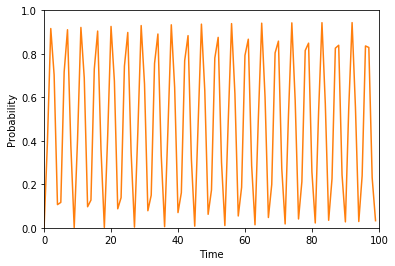

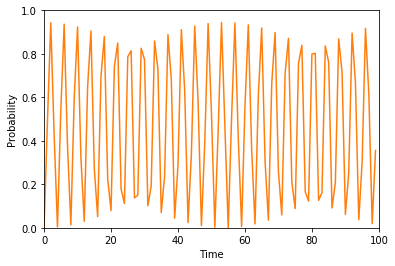

In [5]:
import numpy as np
import cmath 
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

caption = widgets.Label(value='The values of the Magnetic Field')
slider = widgets.FloatSlider(min=0, max=5, value=1, description='Slider')

#Defining Coef 
a = complex(input("a="))
b = complex(input("b="))



def handle_slider_change(change):
    global ax
    B = slider.value

    hb = (6.626e-34)/(2*np.pi)        
    i = complex(0,1) 
    C = 1/(abs(a)+abs(b))

    #Basis State vecters
    up = np.array([1,0])
    down = np.array([0,1])

    #Define Sx operator 
    S_x = (hb/2)*np.array([[0,1],[1,0]])

    #Spin up and down along the x-axis 
    up_x = (1/np.sqrt(2))*np.array([1,1])
    down_x = (1/np.sqrt(2))*np.array([1,-1])

    #Time evolved State Vecter
    Prob = []
    tp = []
    for t in range(0,100):
        E = np.array([np.exp(-i*B*t/2),np.exp(i*B*t/2)])
        psi_t = (C/np.sqrt(2))*((a+b)*E[0]*up_x + (a-b)*E[1]*down_x)
        p_up = (abs(np.dot(np.conj(up),psi_t)))**2
        Prob.append(p_up)
        tp.append(t)
    fig, ax = plt.subplots(1, 1 );
    x = np.linspace(0,100,1)
    y = np.arange(0,1)

    line, = ax.plot(x,y)
    ax.set_xlabel ('Time')
    ax.set_ylabel('Probability')

    def myplot(n):
        line.set_ydata(x**n)
        ax.relim(
        ax.autoscale())
        display(fig)
        clear_output(wait=True)
    
    def on_value_change(change):
        myplot(n=slider.value)
    
    plt.plot(tp,Prob)
    plt.xlim(0,100)
    plt.ylim(0,1)
    plt.show()
    
    
slider.observe(handle_slider_change, names='value')
display(caption, slider)

## 